In [414]:
import plotly.express as px
import pandas as pd
from matplotlib import pyplot as plt
#imported plotly.express and pandas

In [415]:
data=pd.read_excel("sentimentdataset_clean.xlsx")
#read the excel file


## 1. Yearly distribution of sentiments

In [416]:
sentiment_counts = data.groupby("Year")["General_Sentiment"].value_counts().unstack().fillna(0)
#Grouped the data by "Year" and counted the occurrences of values in the "General_Sentiment" column. `Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

In [417]:
data = data[data['Year'] >= 2016]
#filtered out dta that is older than 2016

In [418]:

sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

fig = px.bar(
    sentiment_percentages,
    x=sentiment_percentages.index,
    y=sentiment_percentages.columns,
    title="Sentiment Distribution Across Years",
    labels={"value": "Percentage", "Year": "Year"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

#Calculates the percentage of each sentiment category for each month by dividing the count of each sentiment by the total count of all sentiments for that month and multiplying by 100 to convert it into a percentage.
#Create a bar plot using Plotly, with the x-axis showing the months and the y-axis showing the percentage distribution of sentiments, and display it with a pastel color scheme.

## 2. Monthly distribution of sentiments

In [419]:

sentiment_counts = data.groupby(["Month"])["General_Sentiment"].value_counts().unstack().fillna(0)

sentiment_melted = sentiment_counts.reset_index().melt(id_vars='Month', value_vars=sentiment_counts.columns)

#Grouped the data by "Month" and counts the occurrences values in the "General_Sentiment" column. `Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

#Resets the index of this wide-format DataFrame and then "melt" it into a long format, where each row corresponds to a specific month-sentiment combination.

In [420]:
data = data[data['Year'] >= 2016]
#filtered out data that is older than 2016

In [421]:
fig = px.bar(
    sentiment_melted,
    x='Month',
    y='value',
    color='General_Sentiment',
    title="Sentiment Distribution Across Months",
    labels={"value": "Count", "Month": "Month"},
    color_discrete_sequence=px.colors.sequential.Viridis,
    text='General_Sentiment'
)

fig.show()
#Generate a bar plot, where the x-axis represents the "Month" and the y-axis represents the count of sentiments. The bars are colored based on the "General_Sentiment" category, and the plot uses the Viridis color scheme.
#The `text='General_Sentiment'` option adds labels on each bar, showing the sentiment category.

## 3. Daily distribution of sentiments


In [422]:
sentiment_counts = data.groupby("Day")["General_Sentiment"].value_counts().unstack().fillna(0)
#Grouped the data by "Day" and counted the occurrences of values in the "General_Sentiment" column. `Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

In [423]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [424]:
fig = px.bar(
    sentiment_counts,
    x=sentiment_counts.index,
    y=sentiment_counts.columns,
    title="Sentiment Distribution Across Days",
    labels={"value": "Count", "Day": "Day"},
    color_discrete_sequence=px.colors.qualitative.D3
)

fig.show()

#Sentiment distribution across days. The x-axis is the index, representing days, the y-axis is the sentiment count.
#The bars are colored using a discrete color sequence. The chart is shown using `fig.show()`.

In [425]:
data['Weekday'] = pd.to_datetime(data['Timestamp']).dt.day_name()

ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Weekday'] = pd.Categorical(data['Weekday'], categories=ordered_weekdays, ordered=True)

sentiment_melted = data.groupby('Weekday')['General_Sentiment'].value_counts().unstack(fill_value=0).reset_index().melt(id_vars='Weekday')

sentiment_melted = sentiment_melted.sort_values('Weekday')

fig = px.bar(
    sentiment_melted,
    x='Weekday',
    y='value',
    color='General_Sentiment',
    title="Sentiment Distribution Across Weekdays",
    labels={"value": "Count", "Weekday": "Day of Week"},
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    text='General_Sentiment'
)

fig.show()

#'Timestamp' was converting to datetime and weekday names ware extracted
#Created a Monday-Sunday order in ordered_weekdays, then made sure Weekday is a categorical variable
#Grouped data by Weekday and General Sentiment, and melted for plotting
#Sorted by Weekday (categorical order)
#Create the bar plot with a different color palette (Pastel1)

/var/folders/0_/ryhxg2cd71z1f4879zqk8ffr0000gn/T/ipykernel_6471/814581828.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## 4. Hourly distribution of sentiments


In [426]:
sentiment_counts = data.groupby("Hour")["General_Sentiment"].value_counts().unstack().fillna(0)
#Grouped the data by "Hour" and counted the occurrences of values in the "General_Sentiment" column.
#`Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

In [427]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [428]:
fig = px.bar(
    sentiment_counts,
    x=sentiment_counts.index,
    y=sentiment_counts.columns,
    title="Sentiment Distribution Across Hours",
    labels={"value": "Count", "Hours": "Hours"},
    color_discrete_sequence=px.colors.qualitative.Dark24
)


fig.show()

#Created a bar chart of sentiments by hour, assigned labels and use the color palette Dark24


## Additional: Sentiments per platform

In [429]:
platform_sentiment_counts = data.groupby(['Platform', 'General_Sentiment']).size().reset_index(name='Count')
#The data is grouped by 'Platform' and 'General_Sentiment', counting occurrences of each sentiment per platform.

In [430]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [431]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

platforms = platform_sentiment_counts['Platform'].unique()

cols = len(platforms)
rows = 1

fig = make_subplots(rows=rows, cols=cols, specs=[[{'type':'domain'}]*cols],
                    subplot_titles=platforms)

for i, platform in enumerate(platforms):
    platform_data = platform_sentiment_counts[platform_sentiment_counts['Platform'] == platform]
    row = 1
    col = i % cols + 1 
    
    fig.add_trace(
        go.Pie(
            labels=platform_data['General_Sentiment'],
            values=platform_data['Count'],
            name=platform
        ),
        row=row, col=col
    )

fig.update_layout(
    title_text='Sentiment Distribution Across Platforms',
    height=400,
)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

#This chart visualizes sentiment distribution across multiple platforms.
#The unique platforms are used to define the number of columns for the subplot grid, with one row.
#For each platform, a pie chart is generated, showing the proportions of sentiments using the sentiment counts as values.
#Each pie chart is added to the corresponding subplot.
#The layout is updated with a title and chart size, and the pie charts display the percentage and label inside each segment.

## Additional: Sentiments per county


In [432]:
country_sentiment_counts = data.groupby(['Country', 'General_Sentiment']).size().reset_index(name='Count')
#The data is grouped by 'Country' and 'General_Sentiment', counting occurrences of each sentiment per country.

In [433]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [434]:
fig = px.treemap(
    country_sentiment_counts,
    path=['Country', 'General_Sentiment'],
    values='Count',
    title='Sentiment Distribution by Country',
    color='General_Sentiment',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.show()
#This chart visualize sentiment distribution across different countries.
#The data, `country_sentiment_counts`, is organized using the `path` parameter to create a hierarchical structure.
#The first level represents countries and the second level represents general sentiments.
#The size of each block in the treemap is determined by the 'Count' column, while the colors represent different sentiments using the Set3 color sequence..
#The chart is titled "Sentiment Distribution by Country," and the treemap is displayed with `fig.show()`.

## HashTags analsis by sentiment

In [435]:
from collections import Counter
import itertools

# Extract all hashtags and split them into individual tags
all_hashtags = data['Hashtags'].str.split().tolist()
all_hashtags_flat = list(itertools.chain.from_iterable(all_hashtags))

# Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags_flat)

# Get the top 10 most common hashtags
top_10_hashtags = hashtag_counts.most_common(10)
top_10_hashtags_list = [hashtag for hashtag, count in top_10_hashtags]

In [436]:
# Filter the data to include only rows with the top 10 hashtags
filtered_data_top10 = data[data['Hashtags'].apply(lambda x: any(tag in x for tag in top_10_hashtags_list))]

# Explode the hashtags into individual rows
exploded_data = filtered_data_top10.assign(Hashtag=filtered_data_top10['Hashtags'].str.split()).explode('Hashtag')

# Filter to include only top 10 hashtags
exploded_data = exploded_data[exploded_data['Hashtag'].isin(top_10_hashtags_list)]

# Group by Hashtag and Country and count the occurrences
country_hashtag_counts = exploded_data.groupby(['Country', 'Hashtag']).size().reset_index(name='Count')

/var/folders/0_/ryhxg2cd71z1f4879zqk8ffr0000gn/T/ipykernel_6471/3742760260.py:6: UserWarning:

The palette list has more values (30) than needed (20), which may not be intended.



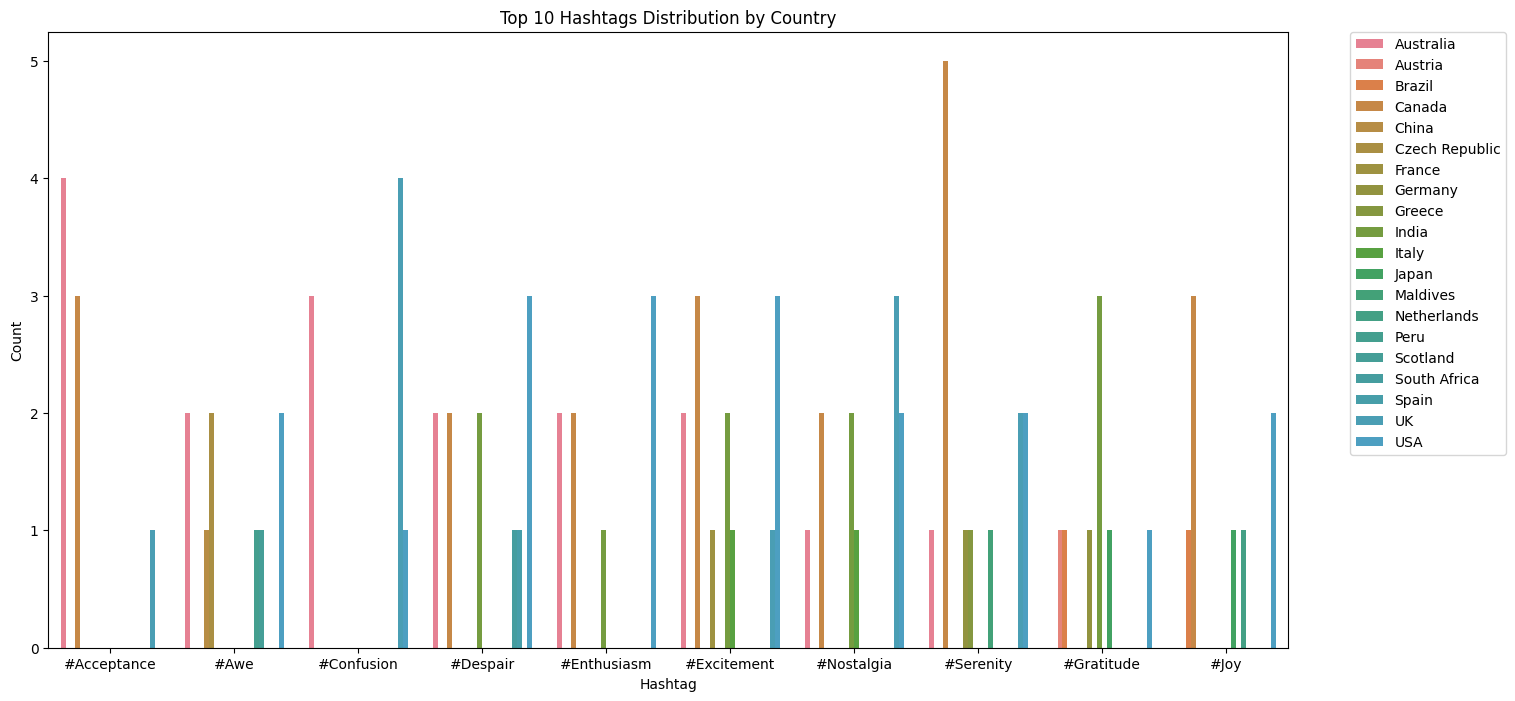

In [437]:
import seaborn as sns
# Use the 'husl' palette for 20 distinct colors
palette = sns.color_palette("husl", n_colors=30)

plt.figure(figsize=(16, 8))
sns.barplot(x='Hashtag', y='Count', hue='Country', data=country_hashtag_counts, palette=palette)

plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Hashtags Distribution by Country')

# Move the legend box outside the plot area to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)

plt.show()

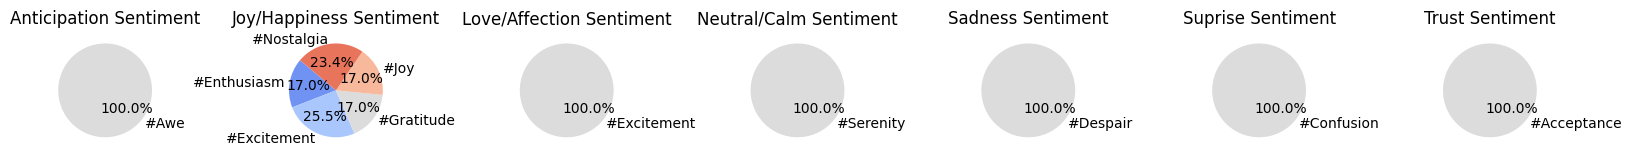

In [438]:
# Group by Hashtag and General_Sentiment and count the occurrences
sentiment_hashtag_counts = exploded_data.groupby(['General_Sentiment', 'Hashtag']).size().reset_index(name='Count')

# Filter top_sentiment_hashtags to keep only the top 10 hashtags
top_sentiment_hashtags_filtered = sentiment_hashtag_counts[sentiment_hashtag_counts['Hashtag'].isin(top_10_hashtags_list)]

# List of unique sentiments
sentiments = top_sentiment_hashtags_filtered['General_Sentiment'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(sentiments), figsize=(16, 8))

# Iterate over each sentiment and plot a pie chart
for sentiment, ax in zip(sentiments, axes):
    # Filter data for the current sentiment
    data = top_sentiment_hashtags_filtered[top_sentiment_hashtags_filtered['General_Sentiment'] == sentiment]
    
    # Pie chart
    ax.pie(data['Count'], labels=data['Hashtag'], autopct='%1.1f%%', startangle=140, 
    
           colors=sns.color_palette('coolwarm', n_colors=len(data)))
    ax.set_title(f'{sentiment} Sentiment')

# Adjust layout
plt.tight_layout()
plt.show()

## Average number of likes compared to the sentiments

In [439]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [440]:
#average_like_number = data.groupby('General_Sentiment')['Likes'].mean()

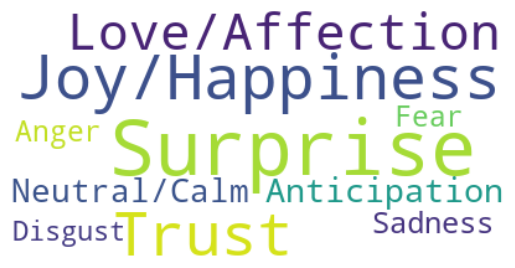

In [441]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_like_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

## Average number of retweets compared to the sentiments

In [442]:
#average_retweet_number = data.groupby('General_Sentiment')['Retweets'].mean()


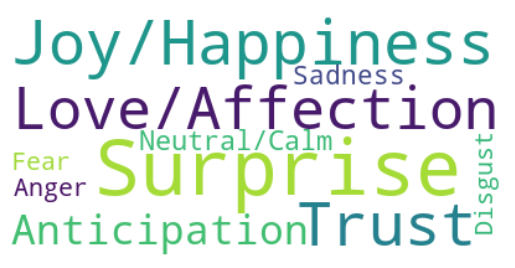

In [443]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_retweet_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

## Analysis of post content


In [444]:
sentiments = data['General_Sentiment'].unique()

for sentiment in sentiments:
    
    text_data = data[data['General_Sentiment'] == sentiment]['Text']
    
    combined_text = ' '.join(text_data)
    
    wordcloud = WordCloud(width=800, height=300, background_color='white').generate(combined_text)
        
    plt.figure(figsize=(10, 5))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.title(f'Word Cloud for Sentiment: {sentiment}', fontsize=16)
    
    plt.axis('off')
    
    plt.show()

KeyError: 'Text'